In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Cau 1

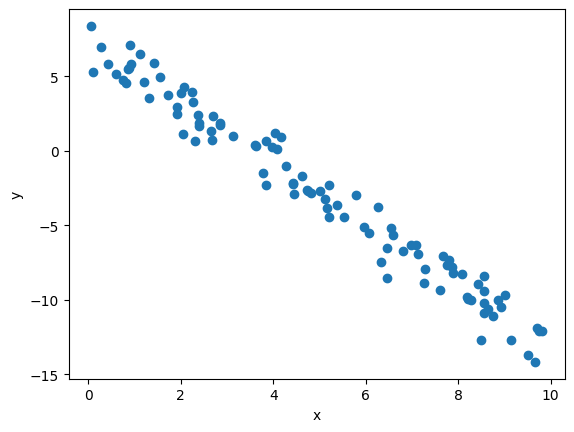

In [85]:
# So diem du lieu
n_points = 100
# Tao du lieu random
X = 10 * np.random.rand(n_points, 1)
y = -2 * X + 7 + np.random.randn(n_points, 1)

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [86]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        input_size = 1
        output_size = 1
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

Epoch [1000/10000], Loss: 1.0802
Epoch [2000/10000], Loss: 1.0797
Epoch [3000/10000], Loss: 1.0797
Epoch [4000/10000], Loss: 1.0797
Epoch [5000/10000], Loss: 1.0797
Epoch [6000/10000], Loss: 1.0797
Epoch [7000/10000], Loss: 1.0797
Epoch [8000/10000], Loss: 1.0797
Epoch [9000/10000], Loss: 1.0797
Epoch [10000/10000], Loss: 1.0797


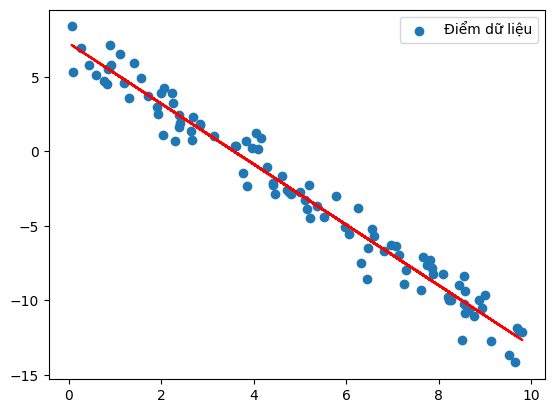

In [87]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10000):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/10000], Loss: {loss.item():.4f}')

predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, label='Điểm dữ liệu')
plt.plot(X, predicted, 'r-')
plt.legend()
plt.show()


# Cau 2

In [103]:
X = np.random.randn(100, 2)
y = np.random.randint(2, size=(100, 1))

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

In [89]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [104]:
model = LogisticRegression()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10000):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/10000], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 0.6926
Epoch [2000/10000], Loss: 0.6920
Epoch [3000/10000], Loss: 0.6920
Epoch [4000/10000], Loss: 0.6920
Epoch [5000/10000], Loss: 0.6920
Epoch [6000/10000], Loss: 0.6920
Epoch [7000/10000], Loss: 0.6920
Epoch [8000/10000], Loss: 0.6920
Epoch [9000/10000], Loss: 0.6920
Epoch [10000/10000], Loss: 0.6920


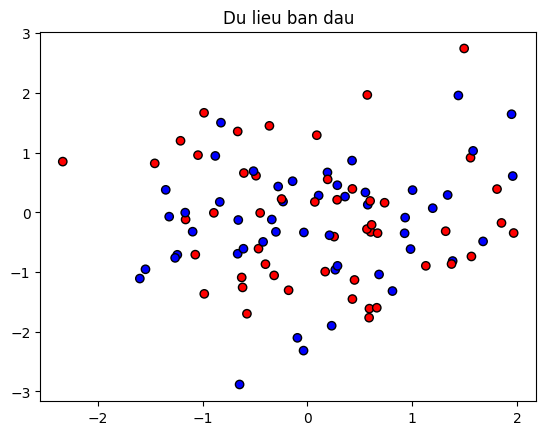

In [108]:
predicted = model(X_tensor).detach().numpy()
predicted_class = np.round(predicted)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.bwr, edgecolors='k')
plt.title('Du lieu ban dau')
plt.show()

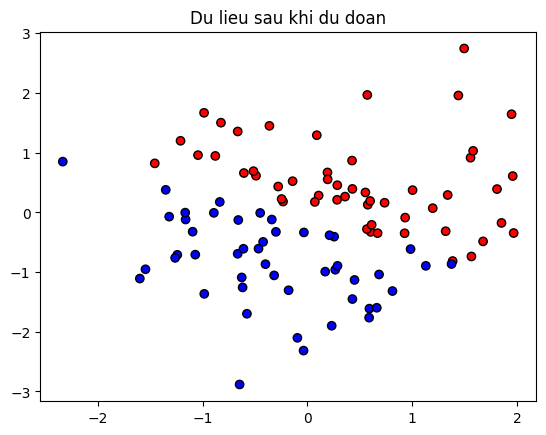

In [107]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_class.flatten(), cmap=plt.cm.bwr, edgecolors='k')
plt.title('Du lieu sau khi du doan')
plt.show()

# cau 3

In [93]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [97]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [99]:
model = XORModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(10000):    
    outputs = model(X)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/10000], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 0.2499
Epoch [2000/10000], Loss: 0.2498
Epoch [3000/10000], Loss: 0.2496
Epoch [4000/10000], Loss: 0.2492
Epoch [5000/10000], Loss: 0.2483
Epoch [6000/10000], Loss: 0.2452
Epoch [7000/10000], Loss: 0.2326
Epoch [8000/10000], Loss: 0.1778
Epoch [9000/10000], Loss: 0.0799
Epoch [10000/10000], Loss: 0.0342


In [100]:
with torch.no_grad():
    predicted = model(X).round()
    print(f'Kết quả dự đoán:\n{predicted}')

Kết quả dự đoán:
tensor([[0.],
        [1.],
        [1.],
        [0.]])
